In [1]:
import pickle
import os

FOLDER = os.getcwd() + "/5cell_test"

with open(FOLDER+'/ori.pkl', 'rb') as file:   
    ori = pickle.load(file)
with open(FOLDER+'/mask.pkl', 'rb') as file:   
    mask = pickle.load(file)
with open(FOLDER+'/out.pkl', 'rb') as file:   
    out = pickle.load(file)
with open(FOLDER+'/psf.pkl', 'rb') as file:   
    original_psf = pickle.load(file)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import math
import numpy as np
import random
import time
from utils import *
from SyMBac.PSF import PSF_generator

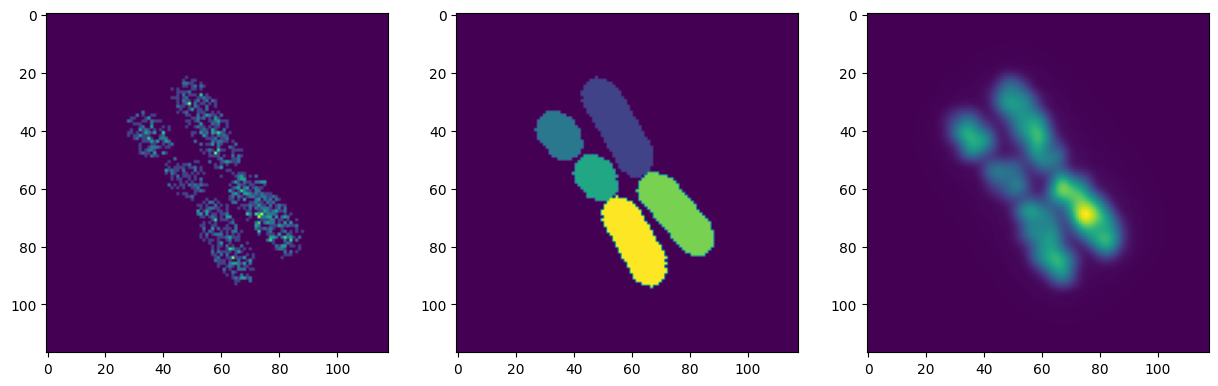

In [3]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(ori)
axarr[1].imshow(mask)
axarr[2].imshow(out)
plt.show()

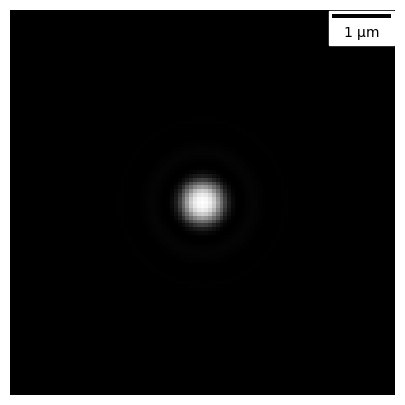

[[1.22360606e-04 1.18749290e-04 9.83829153e-05 ... 9.83829153e-05
  1.18749290e-04 1.22360606e-04]
 [1.18749290e-04 9.78159063e-05 6.57887630e-05 ... 6.57887630e-05
  9.78159063e-05 1.18749290e-04]
 [9.83829153e-05 6.57887630e-05 3.17538820e-05 ... 3.17538820e-05
  6.57887630e-05 9.83829153e-05]
 ...
 [9.83829153e-05 6.57887630e-05 3.17538820e-05 ... 3.17538820e-05
  6.57887630e-05 9.83829153e-05]
 [1.18749290e-04 9.78159063e-05 6.57887630e-05 ... 6.57887630e-05
  9.78159063e-05 1.18749290e-04]
 [1.22360606e-04 1.18749290e-04 9.83829153e-05 ... 9.83829153e-05
  1.18749290e-04 1.22360606e-04]]


/home/boomalope/symbac/symbac/lib/python3.8/site-packages/SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


In [4]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.0, 
    n = 1.4, 
    resize_amount = 1, 
    pix_mic_conv = 0.065, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)
print(psf)

In [5]:
randomPts = 0
originalOutput = out
sourcePts = GetSourcePts(mask)
recoveredImage = InverseMatrix(out, mask, sourcePts, learningRate = 1, psf=psf)

[1.5259022e-05, 3.0518044e-05, 4.5777066e-05, 6.103609e-05, 7.629511e-05]
[[0.69045359]
 [0.75175104]
 [0.45918536]
 [1.        ]
 [0.6902353 ]]


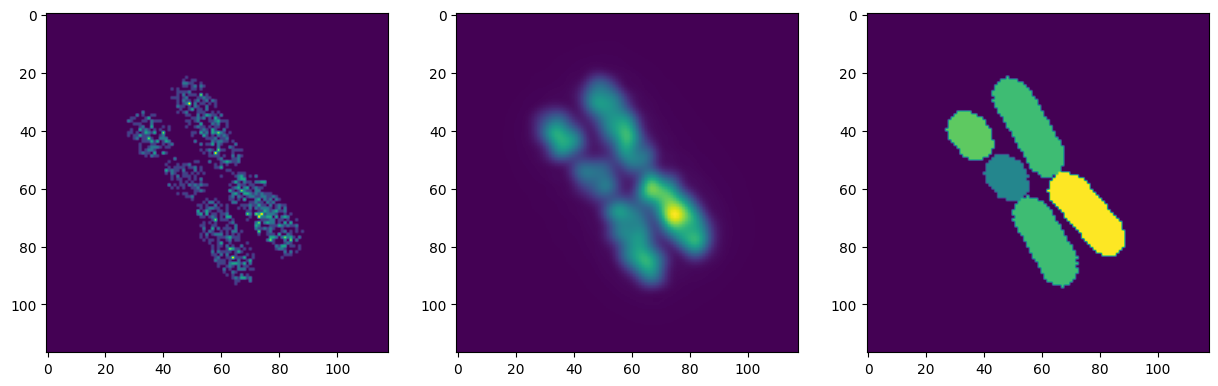

In [6]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(ori)
axarr[1].imshow(out)
axarr[2].imshow(recoveredImage)
plt.show()

array([[1.        , 0.17282204],
       [0.17282204, 1.        ]])

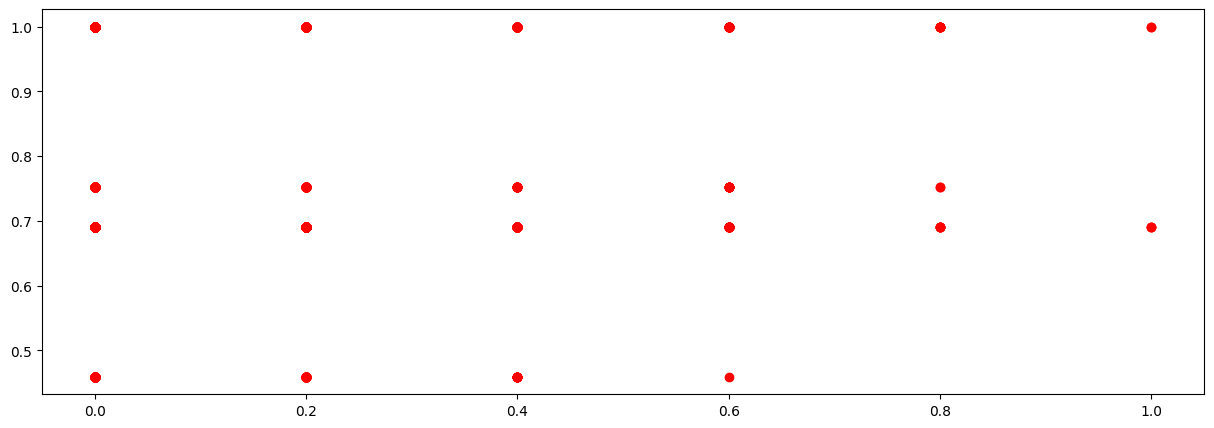

In [7]:
original_intensity = []
custom_intensity = []


for x in sourcePts:
    original_intensity.append(ori[x[0],x[1]])
    custom_intensity.append(recoveredImage[x[0],x[1]])

original_intensity = np.array(original_intensity)
original_intensity = original_intensity/max(original_intensity)
custom_intensity = np.array(custom_intensity)
custom_intensity = custom_intensity/max(custom_intensity)

plt.plot(original_intensity,custom_intensity,'ro')

#Calculate correlation coefficient
np.corrcoef(original_intensity,custom_intensity)

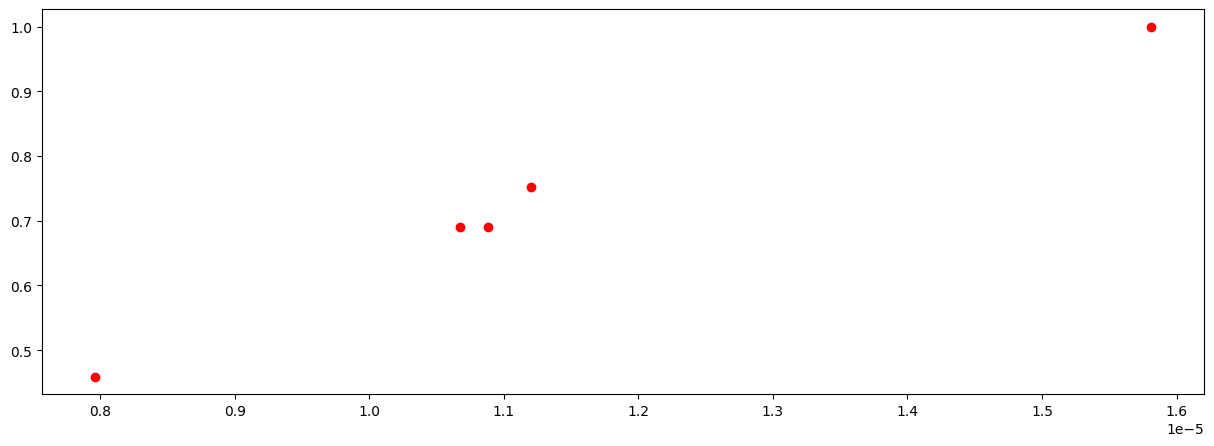

array([[1.        , 0.98829958],
       [0.98829958, 1.        ]])

In [8]:
#Get average intensity in each mask

average_original_intensity = {}
for x in sourcePts:
    if not mask[x[0],x[1]] in average_original_intensity:
        average_original_intensity[mask[x[0],x[1]]] = [ori[x[0],x[1]],1]
    else:
        average_original_intensity[mask[x[0],x[1]]][0] += ori[x[0],x[1]]
        average_original_intensity[mask[x[0],x[1]]][1] += 1

average_custom_intensity = {}
for x in sourcePts:
    if not mask[x[0],x[1]] in average_custom_intensity:
        average_custom_intensity[mask[x[0],x[1]]] = [recoveredImage[x[0],x[1]],1]
    else:
        average_custom_intensity[mask[x[0],x[1]]][0] += recoveredImage[x[0],x[1]]
        average_custom_intensity[mask[x[0],x[1]]][1] += 1


average_original_intensity = [ v[0]/v[1] for k, v in average_original_intensity.items() ]
average_original_intensity = np.array(average_original_intensity)
average_inteaverage_original_intensitynsity = average_original_intensity/max(average_original_intensity)

average_custom_intensity = [ v[0]/v[1] for k, v in average_custom_intensity.items() ]
average_custom_intensity = np.array(average_custom_intensity)
average_custom_intensity = average_custom_intensity/max(average_custom_intensity)

plt.plot(average_original_intensity,average_custom_intensity,'ro')
plt.show()

#Calculate correlation coefficient
np.corrcoef(average_original_intensity,average_custom_intensity)